# EDA Covid jun - set 2022
Dados presentes em https://covid.saude.gov.br/

### Importação das dependências e dos arquivos para análise dos dados


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline

In [3]:
filename = r'C:\Users\levim\OneDrive - Fatec Centro Paula Souza\Downloads\HIST_PAINEL_COVIDBR_2022_Parte1_15set2022.csv'
df = pd.read_csv(filename, delimiter=';', error_bad_lines=False)

C:\Users\levim\AppData\Local\Temp\ipykernel_6924\884283914.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, delimiter=';', error_bad_lines=False)


In [4]:
df.shape

(1017039, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017039 entries, 0 to 1017038
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1017039 non-null  object 
 1   estado                  1016858 non-null  object 
 2   municipio               1008170 non-null  object 
 3   coduf                   1017039 non-null  int64  
 4   codmun                  1011971 non-null  float64
 5   codRegiaoSaude          1008170 non-null  float64
 6   nomeRegiaoSaude         1008170 non-null  object 
 7   data                    1017039 non-null  object 
 8   semanaEpi               1017039 non-null  int64  
 9   populacaoTCU2019        1013238 non-null  float64
 10  casosAcumulado          1017039 non-null  float64
 11  casosNovos              1017039 non-null  int64  
 12  obitosAcumulado         1017039 non-null  int64  
 13  obitosNovos             1017039 non-null  int64  
 14  Re

In [6]:
df.sample(5)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
589842,Sudeste,RJ,Maricá,33,330270.0,33006.0,METROPOLITANA II,2022-05-25,21,161207.0,23159.0,4,789,0,NaN,NaN,1.0
481773,Sudeste,MG,Itaobim,31,313330.0,31065.0,ITAOBIM,2022-05-13,19,21062.0,2624.0,0,59,0,NaN,NaN,0.0
360198,Nordeste,BA,Encruzilhada,29,291040.0,29028.0,VITORIA DA CONQUISTA,2022-01-09,2,17006.0,747.0,2,21,0,NaN,NaN,0.0
132345,Nordeste,PI,Bom Princípio do Piauí,22,220191.0,22005.0,PLANICIE LITORANEA,2022-02-04,5,5630.0,160.0,1,13,0,NaN,NaN,0.0
507635,Sudeste,MG,Nova Lima,31,314480.0,31016.0,BELO HORIZONTE/ NOVA LIMA/ CAETE,2022-04-22,16,94889.0,29257.0,0,265,0,NaN,NaN,1.0


In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    170907
RJ     74134
MG     62149
PR     43774
RS     40027
BA     30031
CE     27186
GO     26882
SC     22029
PE     21867
PA     18463
MT     14710
ES     14495
AM     14178
DF     11759
MA     10896
MS     10626
PB     10254
RN      8267
PI      7764
RO      7246
AL      6953
SE      6358
TO      4164
RR      2153
AP      2140
AC      2004
Name: obitosAcumulado, dtype: int64

## Plot dos gráficos para compreensão dos dados

<AxesSubplot: title={'center': 'Óbitos por região'}, ylabel='regiao'>

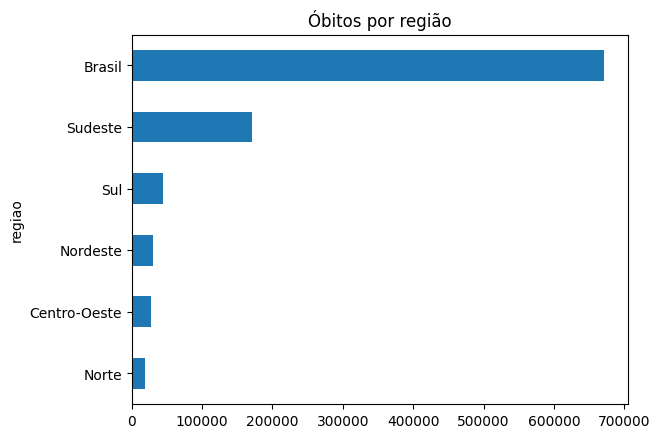

In [23]:
df.groupby('regiao')['obitosAcumulado'].max().sort_values().tail(6).plot(kind='barh', title='Óbitos por região')

<AxesSubplot: title={'center': 'Óbitos por estado'}, ylabel='estado'>

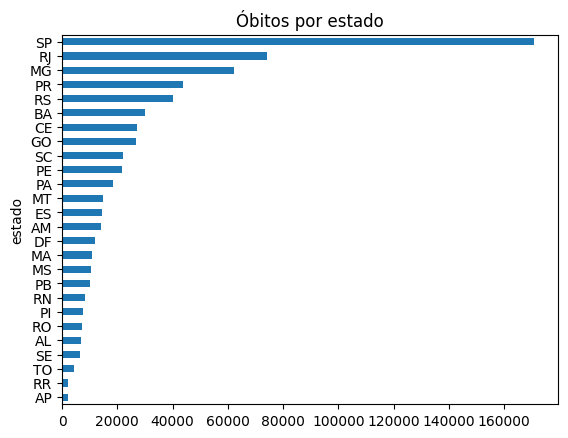

In [15]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(26).plot(kind='barh', title='Óbitos por estado')


<AxesSubplot: ylabel='obitosAcumulado'>

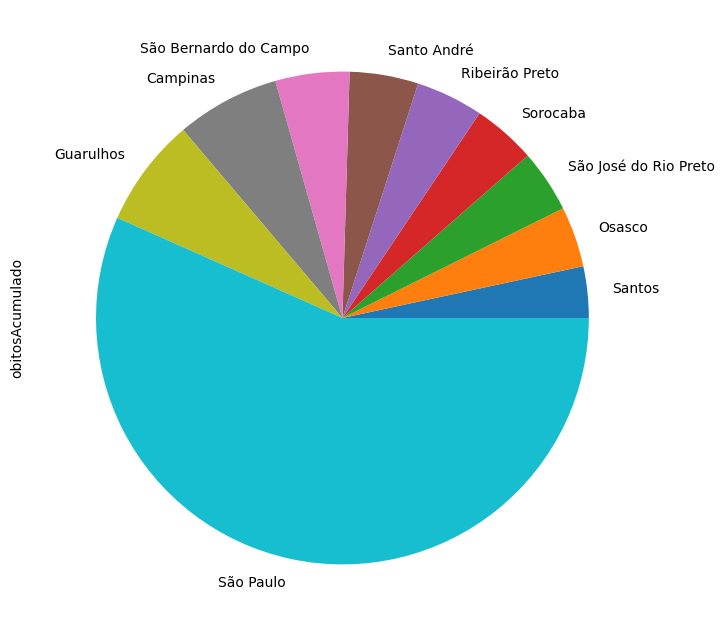

In [28]:
sp = df.query('estado == "SP"')
sp.groupby('municipio')['obitosAcumulado'].max().sort_values().tail(10).plot(kind='pie', figsize=(8,8))

<AxesSubplot: title={'center': 'São José dos Campos'}, xlabel='data'>

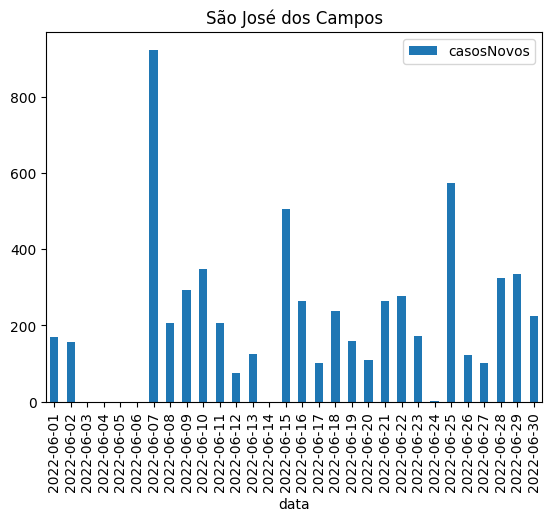

In [16]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(30).plot(kind='bar', x='data', y='casosNovos', title='São José dos Campos')